<img src='https://www.unifor.br/o/unifor-theme/images/unifor-logo-horizontal.svg' width="250px">

# Ciência de Dados

Prof. Túlio Ribeiro<br>
Laboratório de Ciência de Dados e Inteligência Artificial (LCDIA)<br>
Universidade de Fortaleza

# Aprendizado Supervisionado

Seja um conjunto de treinamento com $m$ instâncias e $n$ características, podemos definir:

\begin{equation}\nonumber
    \mathbf{X}=
    \begin{bmatrix}
        1 & x^{(1)}_1 & x^{(1)}_2 & \dots  & x^{(1)}_n\\
        1 & x^{(2)}_1 & x^{(2)}_2 & \dots  & x^{(2)}_n\\
        \vdots & \vdots    & \vdots    & \ddots & \vdots\\
        1 & x^{(m)}_1 & x^{(m)}_2 & \dots  & x^{(m)}_n\\
    \end{bmatrix}
    \quad \text{e} \quad
    \mathbf{y}=
    \begin{bmatrix}
        y^{(1)}\\
        y^{(2)}\\
        \vdots\\
        y^{(m)}
    \end{bmatrix},
\end{equation}

onde $\mathbf{X}$ é a matriz que contêm todas as características de todas as instâncias e $\mathbf{y}$ é o vetor coluna de rótulos de todas as instâncias.

#1 Classificação

## 1.1 Abrindo o dado MNIST

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784',
                     parser = 'auto',
                     as_frame = True) # https://www.openml.org/d/554

print(mnist.feature_names)
print(mnist.target_names)

df = mnist.frame

['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel90', 'pixel91', 'pixel9

In [2]:
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to class
dtypes: category(1), int64(784)
memory usage: 418.8 MB


## 1.2 Visualizando uma instância do dado

In [4]:
X = df.drop('class', axis = 1).to_numpy()
y = df['class'].to_numpy()

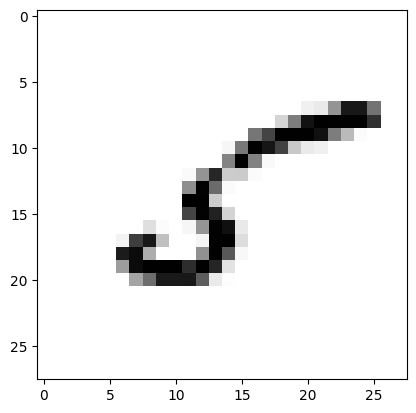

In [36]:
import matplotlib.pyplot as plt

plt.imshow(X[11, :].reshape(28, 28),
           cmap = plt.cm.Greys) # 0,11,35 are '5'

In [6]:
y[11]

'5'

## 1.3 Conjuntos de treinamento e teste

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

## 1.4 Classificador binário (5 ou não-5)

In [8]:
import numpy as np

y_train5 = (y_train == '5').astype(np.int64) # not-five = 0, five = 1
y_test5 = (y_test == '5').astype(np.int64) # not-five = 0, five = 1

### 1.4.1 Definindo um classicador binário

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'log_loss',
                        max_iter = 1000,
                        random_state = 42)

### 1.4.2 Treinando com validação cruzada e medindo a performance de um classicador binário

A Acurácia (Accuracy) de um classificador pode ser definida como:

\begin{equation}
\text{Acurária} = \frac{\text{Número de predições corretas}}{\text{Número total de predições}}
\end{equation}

In [10]:
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(sgd_clf,
                           X_train,
                           y_train5,
                           cv = 3,
                           scoring = 'accuracy')
cv_score # Accuracy

array([0.92382279, 0.96105427, 0.96174863])

### 1.4.3 Definindo, treinando e medindo a performance de um classificador "dumb"

In [11]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y = None):
        pass

    def predict(self, X):
        return np.full((X.shape[0], 1), False)

nf_clf = Never5Classifier()

In [12]:
cv_score = cross_val_score(nf_clf,
                           X_train,
                           y_train5,
                           cv = 3,
                           scoring = 'accuracy')

cv_score # Accuracy is generally not the prefered performance measure for classifiers

array([0.91107302, 0.90914448, 0.90978249])

#### 1.4.3.1 Subamostragem aleatória

In [13]:
idx_no5 = np.argwhere(y_train5 == 0).ravel()
print(idx_no5.shape)

(50960,)


In [14]:
idx_5 = np.argwhere(y_train5 == 1).ravel()
print(idx_5.shape)

(5040,)


In [15]:
idx = np.concatenate([idx_no5[:5040], idx_5[:5040]])

X_train_subsampled = X[idx, :].copy()
y_train5_subsampled = y_train5[idx].copy()

In [16]:
cv_score = cross_val_score(sgd_clf,
                           X_train_subsampled,
                           y_train5_subsampled,
                           cv = 3,
                           scoring = 'accuracy')
cv_score

array([0.50833333, 0.5047619 , 0.48839286])

In [17]:
cv_score = cross_val_score(nf_clf,
                           X_train_subsampled,
                           y_train5_subsampled,
                           cv = 3,
                           scoring = 'accuracy')

cv_score

array([1. , 0.5, 0. ])

### 1.4.4 Matriz de confusão

In [18]:
from sklearn.model_selection import cross_val_predict

y_train5_pred = cross_val_predict(sgd_clf,
                                  X_train,
                                  y_train5,
                                  cv = 3)
y_train5_pred

array([1, 0, 1, ..., 0, 0, 0])

In [19]:
from sklearn.metrics import confusion_matrix

C = confusion_matrix(y_train5,
                     y_train5_pred)

C

array([[48763,  2197],
       [  666,  4374]])

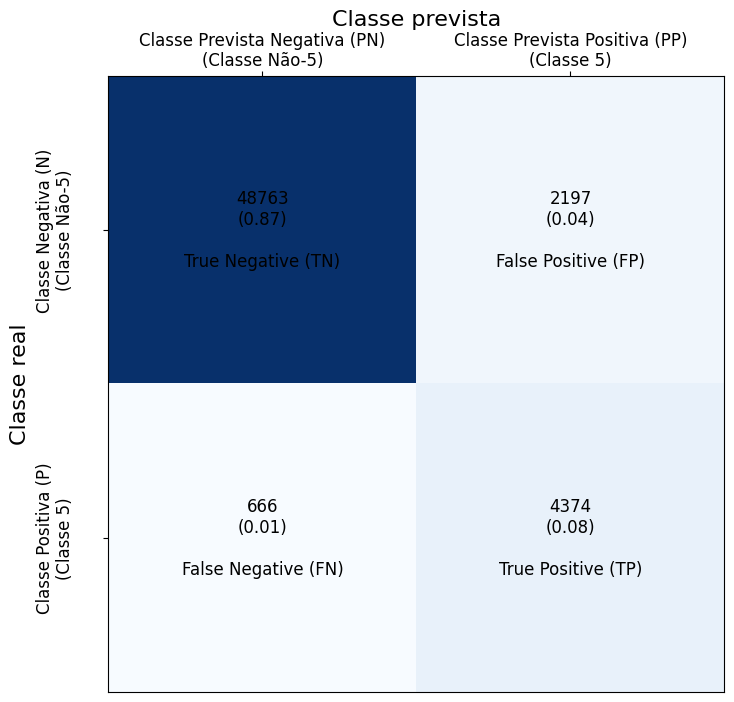

In [20]:
def plot_matrix(C):
    C_norm = C / C.sum()

    rows = ['Classe Negativa (N)\n(Classe Não-5)', 'Classe Positiva (P)\n(Classe 5)']
    columns = ['Classe Prevista Negativa (PN)\n(Classe Não-5)', 'Classe Prevista Positiva (PP)\n(Classe 5)']

    fig, ax = plt.subplots(figsize = (8, 8))

    ax.matshow(C, cmap = plt.cm.Blues) # cool

    clabel = [['True Negative (TN)', 'False Positive (FP)'],
              ['False Negative (FN)', 'True Positive (TP)']]

    clabel = np.array(clabel, dtype = object)

    for (i, j), c in np.ndenumerate(C):
        label = '{}\n({:0.2f})\n\n{}'.format(c, C_norm[i, j], clabel[i, j])
        ax.text(j, i, label, ha = 'center', va = 'center', fontsize = 12)

    ax.set_xticks(range(len(columns)))
    ax.set_yticks(range(len(rows)))
    ax.set_xticklabels(columns, ha = 'center', va = 'center', fontsize = 12)
    ax.set_yticklabels(rows, ha = 'center', va = 'center', fontsize = 12, rotation = 90)

    ax.set_xlabel('Classe prevista', fontsize = 16)
    ax.set_ylabel('Classe real', fontsize = 16)

    ax.tick_params(top = True,
                   bottom = False,
                   labeltop = True,
                   labelbottom = False)

    ax.tick_params(axis = 'x', pad = 15)
    ax.tick_params(axis = 'y', pad = 35)

    ax.xaxis.set_label_position('top')

plot_matrix(C)

![picture](https://drive.google.com/thumbnail?id=1ZOuTBkc9h9SYXhdkqVbDbS1cS4FcpvL7&sz=w800)

### 1.4.5 Precisão, Revocação e Pontuação $F_1$

A Precisão (Precision) de um classificador é definida por:

\begin{equation}
\text{Precisão} = \frac{\text{TP}}{\text{PP}} = \frac{\text{TP}}{\text{TP}+\text{FP}}.
\end{equation}

In [21]:
from sklearn.metrics import precision_score

precision_score(y_train5, y_train5_pred)

0.6656521077461574

Já a Revocação, Recall ou Sensibilidade ou True Positive Rate (TPR), é dada por:

\begin{equation}
\text{Revocação} = \frac{\text{TP}}{\text{P}} = \frac{\text{TP}}{\text{TP}+\text{FN}}.
\end{equation}

In [22]:
from sklearn.metrics import recall_score

recall_score(y_train5, y_train5_pred)

0.8678571428571429

Nesse contexto, a Acurácia pode ser rescrita como:

\begin{equation}
\text{Acurácia} = \frac{\text{TP}+\text{TN}}{\text{P}+\text{N}}.
\end{equation}

In [23]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train5, y_train5_pred)

0.948875

Finalmente, definimos a pontuação $F_1$ ($F_1$-score), a fim de analisar um classificador através de uma única métrica, como a média harmônica da precisão e revocação:

\begin{equation}
F_1 = \frac{2}{\displaystyle\frac{1}{\text{Precisão}}+\displaystyle\frac{1}{\text{Revocação}}}
=
\frac{\text{TP}}{\text{TP}+\displaystyle\frac{\text{FN}+\text{FP}}{2}}.
\end{equation}

In [24]:
from sklearn.metrics import f1_score

f1_score(y_train5, y_train5_pred)

0.753423477736629

![picture](https://drive.google.com/thumbnail?id=1DoRHTuk8dprUtdaR477zsMUoVMRkTLWP&sz=w800)

### 1.4.6 Trade-off Precisão/Revocação

![picture](https://drive.google.com/thumbnail?id=1zY7x-usRp4QT60HXya4De21SOXqdyBqy&sz=w800)

In [25]:
y_score = cross_val_predict(sgd_clf,
                            X_train,
                            y_train5,
                            cv = 3,
                            method = 'decision_function')

In [26]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train5, y_score)

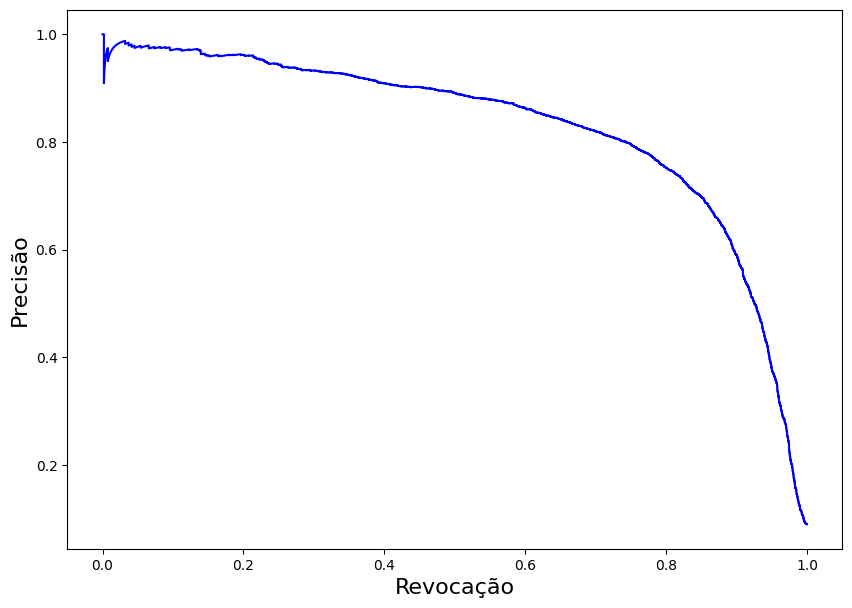

In [27]:
def plot_precision_vs_recall(precisions, recalls):

    fig, ax = plt.subplots(figsize = (10, 7))

    ax.plot(recalls,
            precisions,
            'b-')

    ax.set_xlabel('Revocação', fontsize = 16)
    ax.set_ylabel('Precisão', fontsize = 16)

plot_precision_vs_recall(precisions, recalls)

<ipython-input-28-731279a2e1e0>:1: RuntimeWarning: divide by zero encountered in divide
  f1_scores = 2 / (1 / precisions + 1 / recalls)


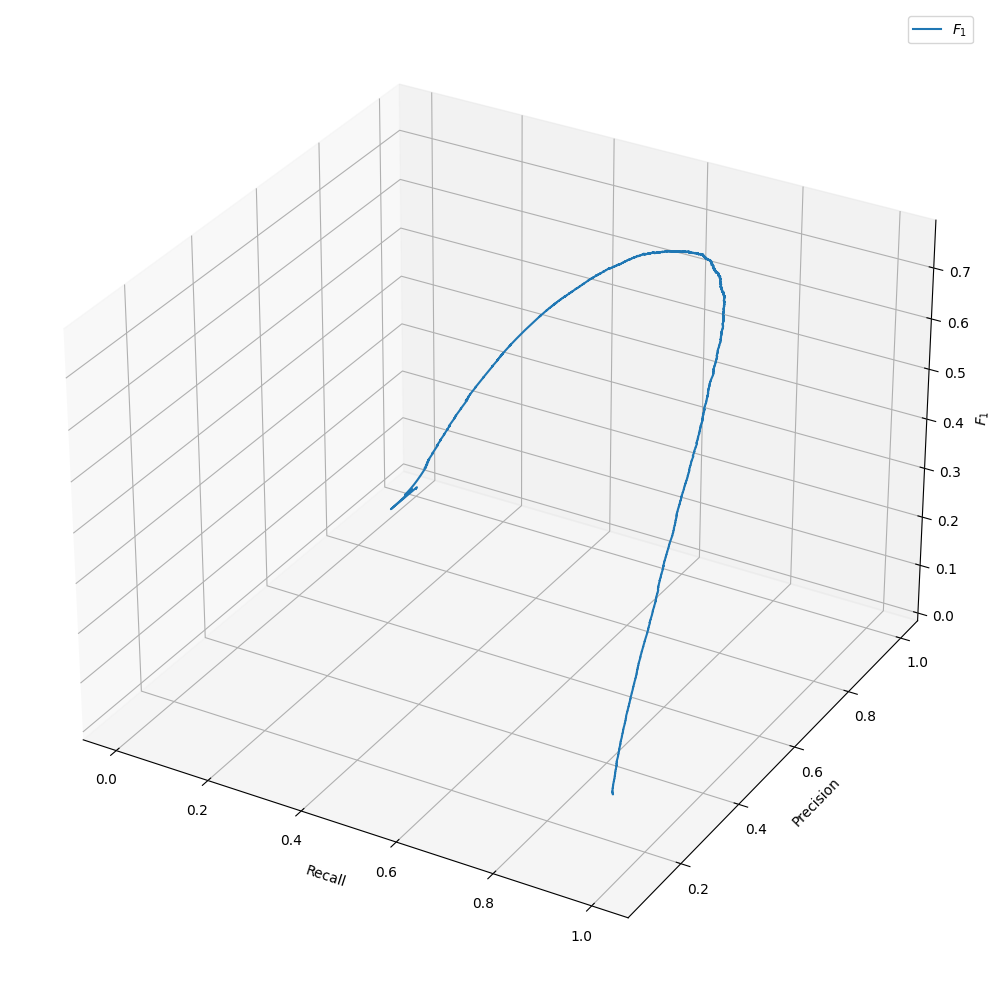

In [28]:
f1_scores = 2 / (1 / precisions + 1 / recalls)
fig, ax = plt.subplots(figsize = (10, 10),
                       subplot_kw = {'projection': '3d',
                                     'computed_zorder': False})

ax.plot(recalls,
        precisions,
        f1_scores,
        label = '$F_1$')

ax.legend()

ax.set(xlabel = 'Recall',
       ylabel = 'Precision',
       zlabel = '$F_1$')

plt.tight_layout()

In [29]:
idx = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx]
threshold_for_90_precision

9458.692806991306

In [30]:
y_train5_pred_90 = (y_score >= threshold_for_90_precision).astype(np.int64)

In [31]:
precision_score(y_train5, y_train5_pred_90)

0.9000777604976672

In [32]:
recall_score(y_train5, y_train5_pred_90)

0.4593253968253968

## 1.4.7 Curva ROC

A curva Característica de Operação do Receptor, ou Receiver Operating Characteristic (ROC), é defina pelo gráfico da Revocação versus a False Positive Rate (FPR). Note que

\begin{equation}
FPR = 1 - TNR,
\end{equation}

onde TNR é a True Negative Rate, também conhecida como especificidade ou fall-out.

In [33]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train5, y_score) # fpr = false positive rate, tpr = true positive rate

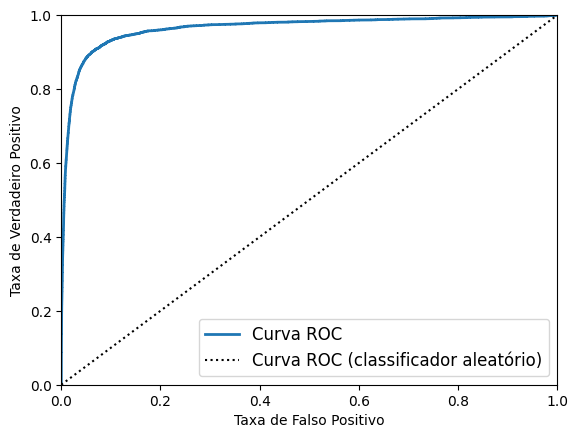

In [34]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr,
             tpr,
             lw = 2,
             label ='Curva ROC')

    plt.plot([0, 1],
             [0, 1],
             'k:',
             label = 'Curva ROC (classificador aleatório)')

    plt.xlabel('Taxa de Falso Positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.axis([0, 1, 0, 1])

    plt.legend(loc = 'lower right',
            fontsize = 12)

plot_roc_curve(fpr, tpr)

#### 1.4.7.1 Área sob a Curva ou Area Under the Curve (AUC)



In [35]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train5, y_score)

0.9646993362363261

Lembrete:

- Sempre que a classe positiva for rara ou quando os falsos positivos forem mais importantes que os falsos negativos, use a curva de Precisão/Revocação. Caso contrário, use a curva ROC.